In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load all the data from './tmp_csvs_single_per_obs: wine.csv, astep.csv, tess.csv as dataframes, and combine them into one dataframe
wine = pd.read_csv('./tmp_csvs_single_per_obs/wine.csv')
astep = pd.read_csv('./tmp_csvs_single_per_obs/astep.csv')
tess = pd.read_csv('./tmp_csvs_single_per_obs/tess.csv')
all_obs = pd.concat([wine, astep, tess], ignore_index=True)


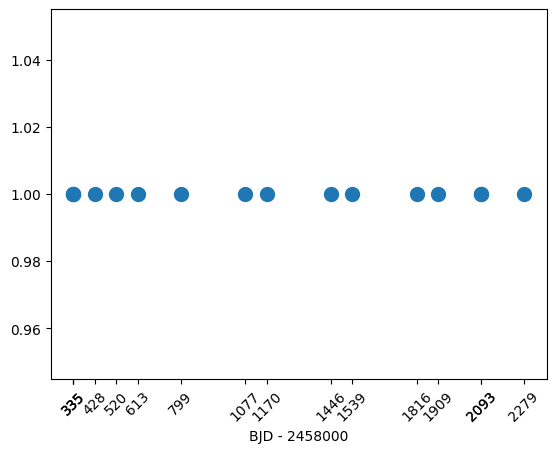

In [8]:
df = all_obs

# Plotting
fig, ax = plt.subplots()
scatter = ax.scatter(df['time'], df['flux'], s=100)

# Customizing the x-axis to show labels only at data points
ax.set_xticks(df['time'])
ax.set_xticklabels([f'{x:.0f}' for x in df['time']], rotation=45)
ax.set_xlabel("BJD - 2458000")

plt.show()

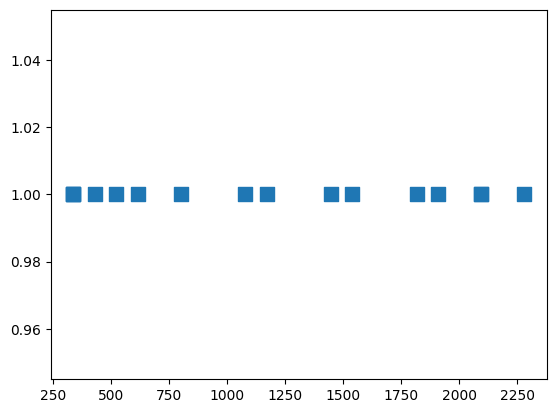

In [7]:
# Again, but instead of a circle, use a square
fig, ax = plt.subplots()
scatter = ax.scatter(df['time'], df['flux'], s=100, marker='s')


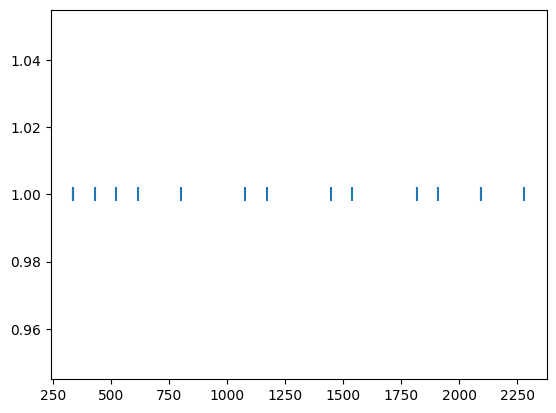

In [9]:
# Again, but a thin line instead of a square
fig, ax = plt.subplots()
scatter = ax.scatter(df['time'], df['flux'], s=100, marker='|')


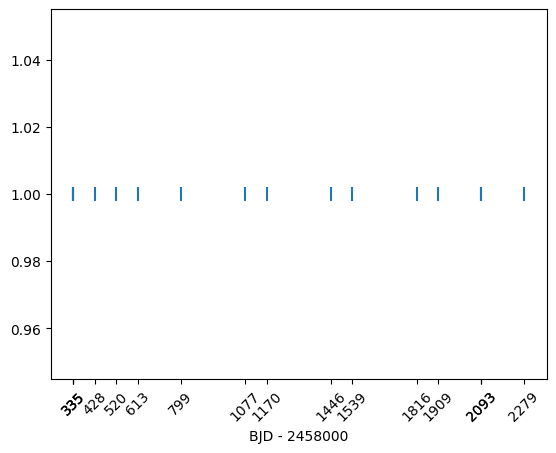

In [10]:
fig, ax = plt.subplots()
scatter = ax.scatter(df['time'], df['flux'], s=100, marker='|')

# Customizing the x-axis to show labels only at data points
ax.set_xticks(df['time'])
ax.set_xticklabels([f'{x:.0f}' for x in df['time']], rotation=45)
ax.set_xlabel("BJD - 2458000")

plt.show()

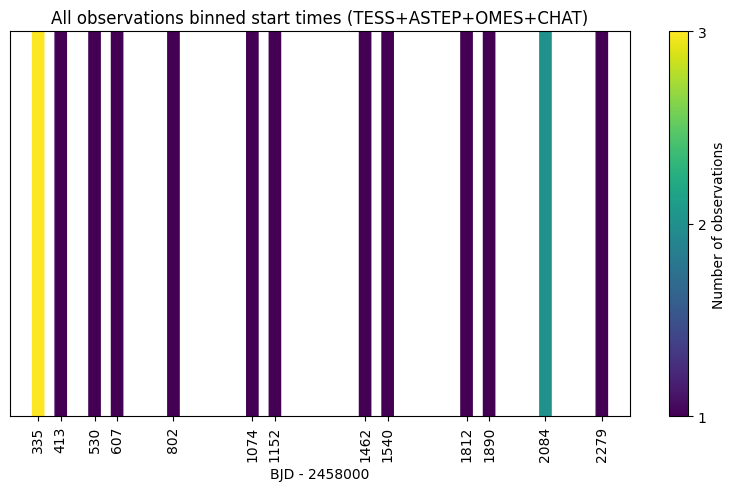

In [55]:
# If there is more than one observation per time (in 1 unit of time around any point), then the points will overlap.
# Inside the plot, instead of a marker, use a number to indicate how many points are at that location
# This is called a "hexbin" plot
fig, ax = plt.subplots()
scatter = ax.hexbin(df['time'], df['flux'], gridsize=50, mincnt=1)
# add the colorbar using the figure's method, natural numbers only, from 1 to 3, in grayscale
# Colorbar should go from gray to black
scatter.cmap.set_under('gray')
scatter.cmap.set_over('black')
fig.colorbar(scatter, ticks=[1, 2, 3], ax=ax, label='Number of observations')

# Get the hexbin centers into a list
centers = scatter.get_offsets().data
# Convert it to a list, keep only the x
centers = [x[0] for x in centers.tolist()]

# Set the x-axis ticks to be the centers of the hexbins, 90 degree rotation
ax.set_xticks(centers)
ax.set_xticklabels([f'{x:.0f}' for x in centers], rotation=90)
ax.set_xlabel("BJD - 2458000")

# Remove the y-axis ticks
ax.set_yticks([])

# # Make the bins far bigger (stretch them)
ax.set_ylim(0.9999, 1.0001)

# Set the title
ax.set_title("All observations binned start times (TESS+ASTEP+OMES+CHAT)")

# Make the plot bigger
fig.set_size_inches(10, 5)

# Save the plot
plt.savefig('all_obs_times.png', bbox_inches='tight', dpi=300)
